# Experiments showcase

This notebook contains runnable experiments for polynomial regression using gradient descent and various optimizers.
It demonstrates how to run a single experiment, run a suite of experiments, and plot results comparing the learned models to the Runge function.

In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

import numpy as np
from sklearn.preprocessing import normalize
from Functions.optimizers import Optimizers
from Functions.gradients import Gradients
from Functions.gradientdescent_lib import GradientDescent, generateData, featureMat
from Functions.runExperiments import RunAllExperiments
from Functions.PLOT import plot

c:\Users\maxfo\Python\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


To run a single experiment

In [2]:
np.random.seed(1)

epoch = 100                                                                   # specify the maximum numbre of epoch to train for
n_features = 4                                                                # specify the number of features for your moddel
noIntercept = False
optimizer = Optimizers.RMSprop(0.01, 0.9, n_features+int(not noIntercept))    # pick your favorite Optimizer
gradient = Gradients.Lasso(0.1)                                               # pick your favorite 

# generate the data 
x_train, x_test, y_train, y_test = generateData(100, 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()
X_train = featureMat(x_train, n_features, noIntercept=noIntercept)
X_test = featureMat(x_test, n_features, noIntercept=noIntercept)

gd = GradientDescent(n_features, noIntercept=noIntercept)
gd.setOptimizer(optimizer)
gd.setGradient(gradient)

theta, MSEs, R2, numberEpoch = gd.train(X_train, y_train, X_test, y_test, epoch)

To run all experiments

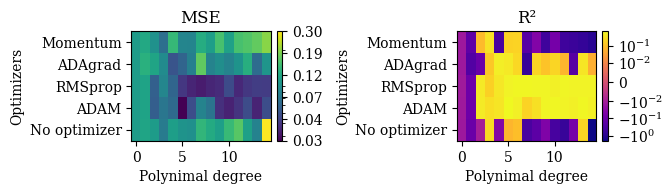

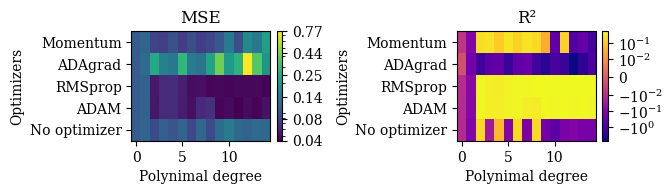

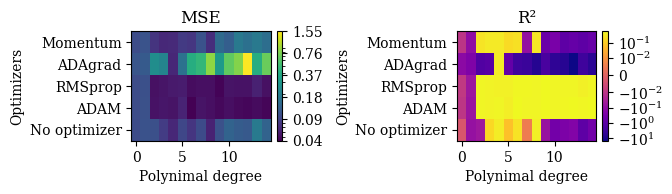

In [3]:
np.random.seed(1)

# run the experiments
rae = RunAllExperiments()
rae.run(False)
rae.createHeatMap(r"figures/")

# save the MSE tabels generated to files
#rae.exportLogsLatex("MSE", r"figures\MSEtable.tex")

# add the benchmark MSE table to the same file
#rae.exportLogsLatex("bm", r"figures\MSEtable.tex", writeType="a")

Stochastic gradient descent of top results

Stochastic gradient descent of OLS with RMSprop 4 features

In [4]:
np.random.seed(1)

epoch = 100
learningRate = 0.05
n_features = 4
noIntercept = False
optimizer = Optimizers.RMSprop(learningRate, 0.99, n_features+int(not noIntercept))
gradient = Gradients.OLS()

# generate the data 
x_train, x_test, y_train, y_test = generateData(100, 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()
X_train = featureMat(x_train, n_features, noIntercept=noIntercept)
X_test = featureMat(x_test, n_features, noIntercept=noIntercept)

gd = GradientDescent(n_features, noIntercept=noIntercept, stochastichGD=True)
gd.setOptimizer(optimizer)
gd.setGradient(gradient)

theta, MSEs, numberEpoch = gd.train(x_train, y_train, X_test, y_test, epoch)

print("Final MSE", MSEs[-1])

ValueError: too many values to unpack (expected 3)

Stochastic gradient descent of OLS with RMSprop and 6 features

In [ ]:
np.random.seed(1)

epoch = 100
learningRate = 0.05
n_features = 6
noIntercept = False
optimizer = Optimizers.RMSprop(learningRate, 0.99, n_features+int(not noIntercept))
gradient = Gradients.OLS()

# generate the data 
x_train, x_test, y_train, y_test = generateData(100, 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()
X_train = featureMat(x_train, n_features, noIntercept=noIntercept)
X_test = featureMat(x_test, n_features, noIntercept=noIntercept)

gd = GradientDescent(n_features, noIntercept=noIntercept, stochastichGD=True)
gd.setOptimizer(optimizer)
gd.setGradient(gradient)

theta, MSEs, numberEpoch = gd.train(x_train, y_train, X_test, y_test, epoch)

print("Final MSE: ", MSEs[-1])

Final MSE:  0.034991160680458704


Plot of 6 feature RMSprop with OLS model against Runge function

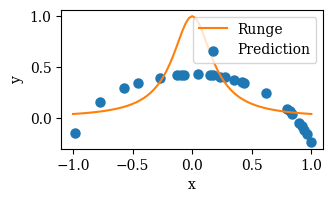

In [ ]:
np.random.seed(1)

epoch = 100
n_features = 6
noIntercept = False
optimizer = Optimizers.RMSprop(0.01, 0.99, n_features+int(not noIntercept))
gradient = Gradients.OLS()

# generate the data 
x_train, x_test, y_train, y_test = generateData(100, 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()
X_train = featureMat(x_train, n_features, noIntercept=noIntercept)
X_test = featureMat(x_test, n_features, noIntercept=noIntercept)

gd = GradientDescent(n_features, noIntercept=noIntercept)
gd.setOptimizer(optimizer)
gd.setGradient(gradient)

theta, MSEs, numberEpoch = gd.train(X_train, y_train, X_test, y_test, epoch)
prediction = gd.predict(X_test)

# Actual Runge function
x = np.linspace(-1, 1, 75)
y = 1 / (1 + 25*np.power(x, 2))

plot(2, [x, x_test], [y, prediction], y_feature_label=["Runge", "Prediction"], figurename="RMSpropOLS4plot", scatter=[False, True], save=True, multiX=True)

Plot of the Runge function and data points

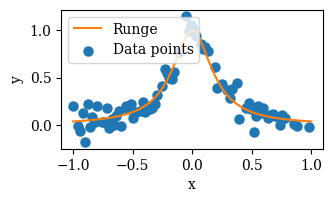

In [ ]:
np.random.seed(1)

# generate the data 
x_train, x_test, y_train, y_test = generateData(100, 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()
X_train = featureMat(x_train, n_features, noIntercept=noIntercept)
X_test = featureMat(x_test, n_features, noIntercept=noIntercept)

gd = GradientDescent(n_features, noIntercept=noIntercept)
gd.setOptimizer(optimizer)
gd.setGradient(gradient)

# Actual Runge function
x = np.linspace(-1, 1, 75)
y = 1 / (1 + 25*np.power(x, 2))

plot(2, [x, x_train], [y, y_train], y_feature_label=["Runge", "Data points"], figurename="RungeTestDataPlot", scatter=[False, True], save=True, multiX=True)